In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
import warnings 
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import xgboost
xgboost.set_config(verbosity=0)

In [2]:
df=pd.read_csv("D:\\OneDrive\\Desktop\\Projects\\credit default\\Credit_default_dataset.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.shape

(30000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.rename(columns={'default.payment.next.month':'target','PAY_0':'Pay_1'},inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   Pay_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Pay_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
df=df.drop('ID',axis=1)

In [10]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [11]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [12]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [13]:
df['EDUCATION']=df['EDUCATION'].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
df['MARRIAGE']=df['MARRIAGE'].map({0:3,1:1,2:2,3:3})

In [14]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [15]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

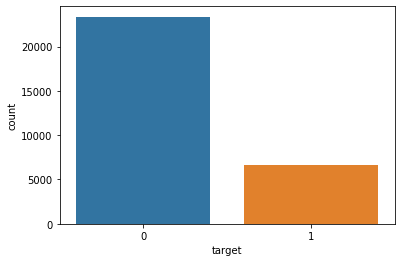

In [16]:
sns.countplot(df['target'])

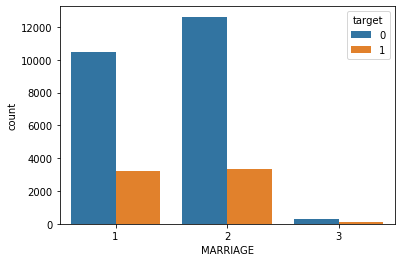

In [17]:
sns.countplot(df['MARRIAGE'],hue=df['target'])

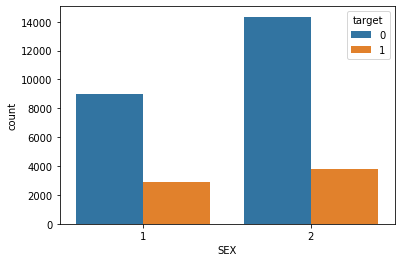

In [18]:
sns.countplot(df['SEX'],hue=df['target'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001909BFAF948>,
      dtype=object)

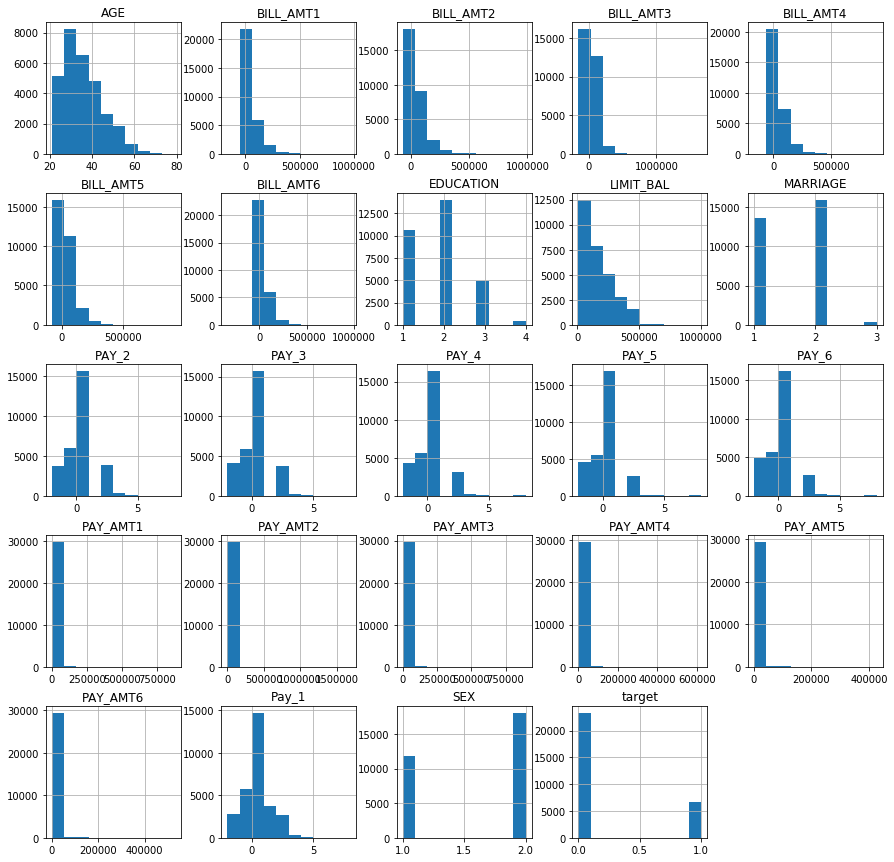

In [19]:
df.hist(figsize=(15,15))

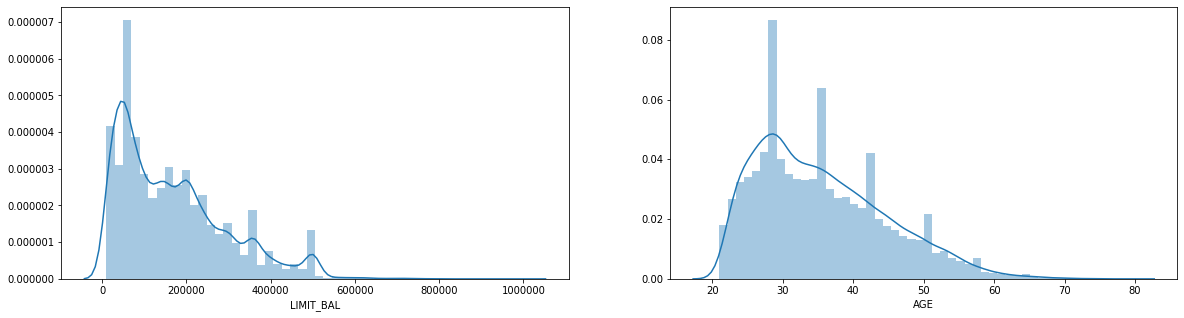

In [20]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(df.AGE)

plt.show()

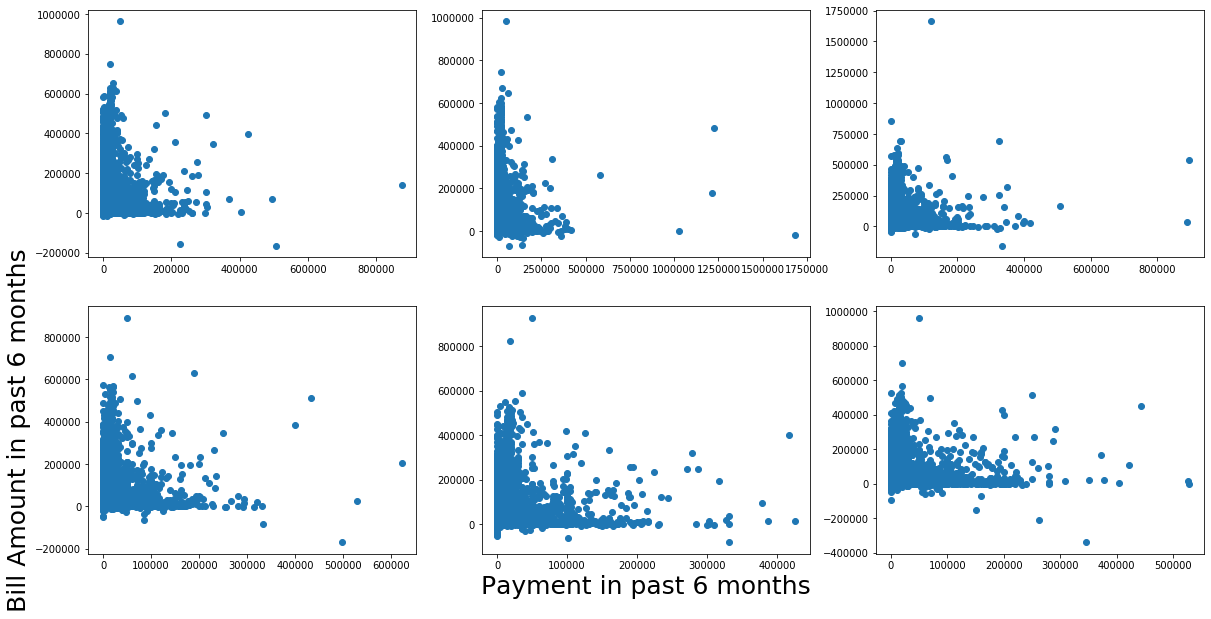

In [21]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6)

plt.show()

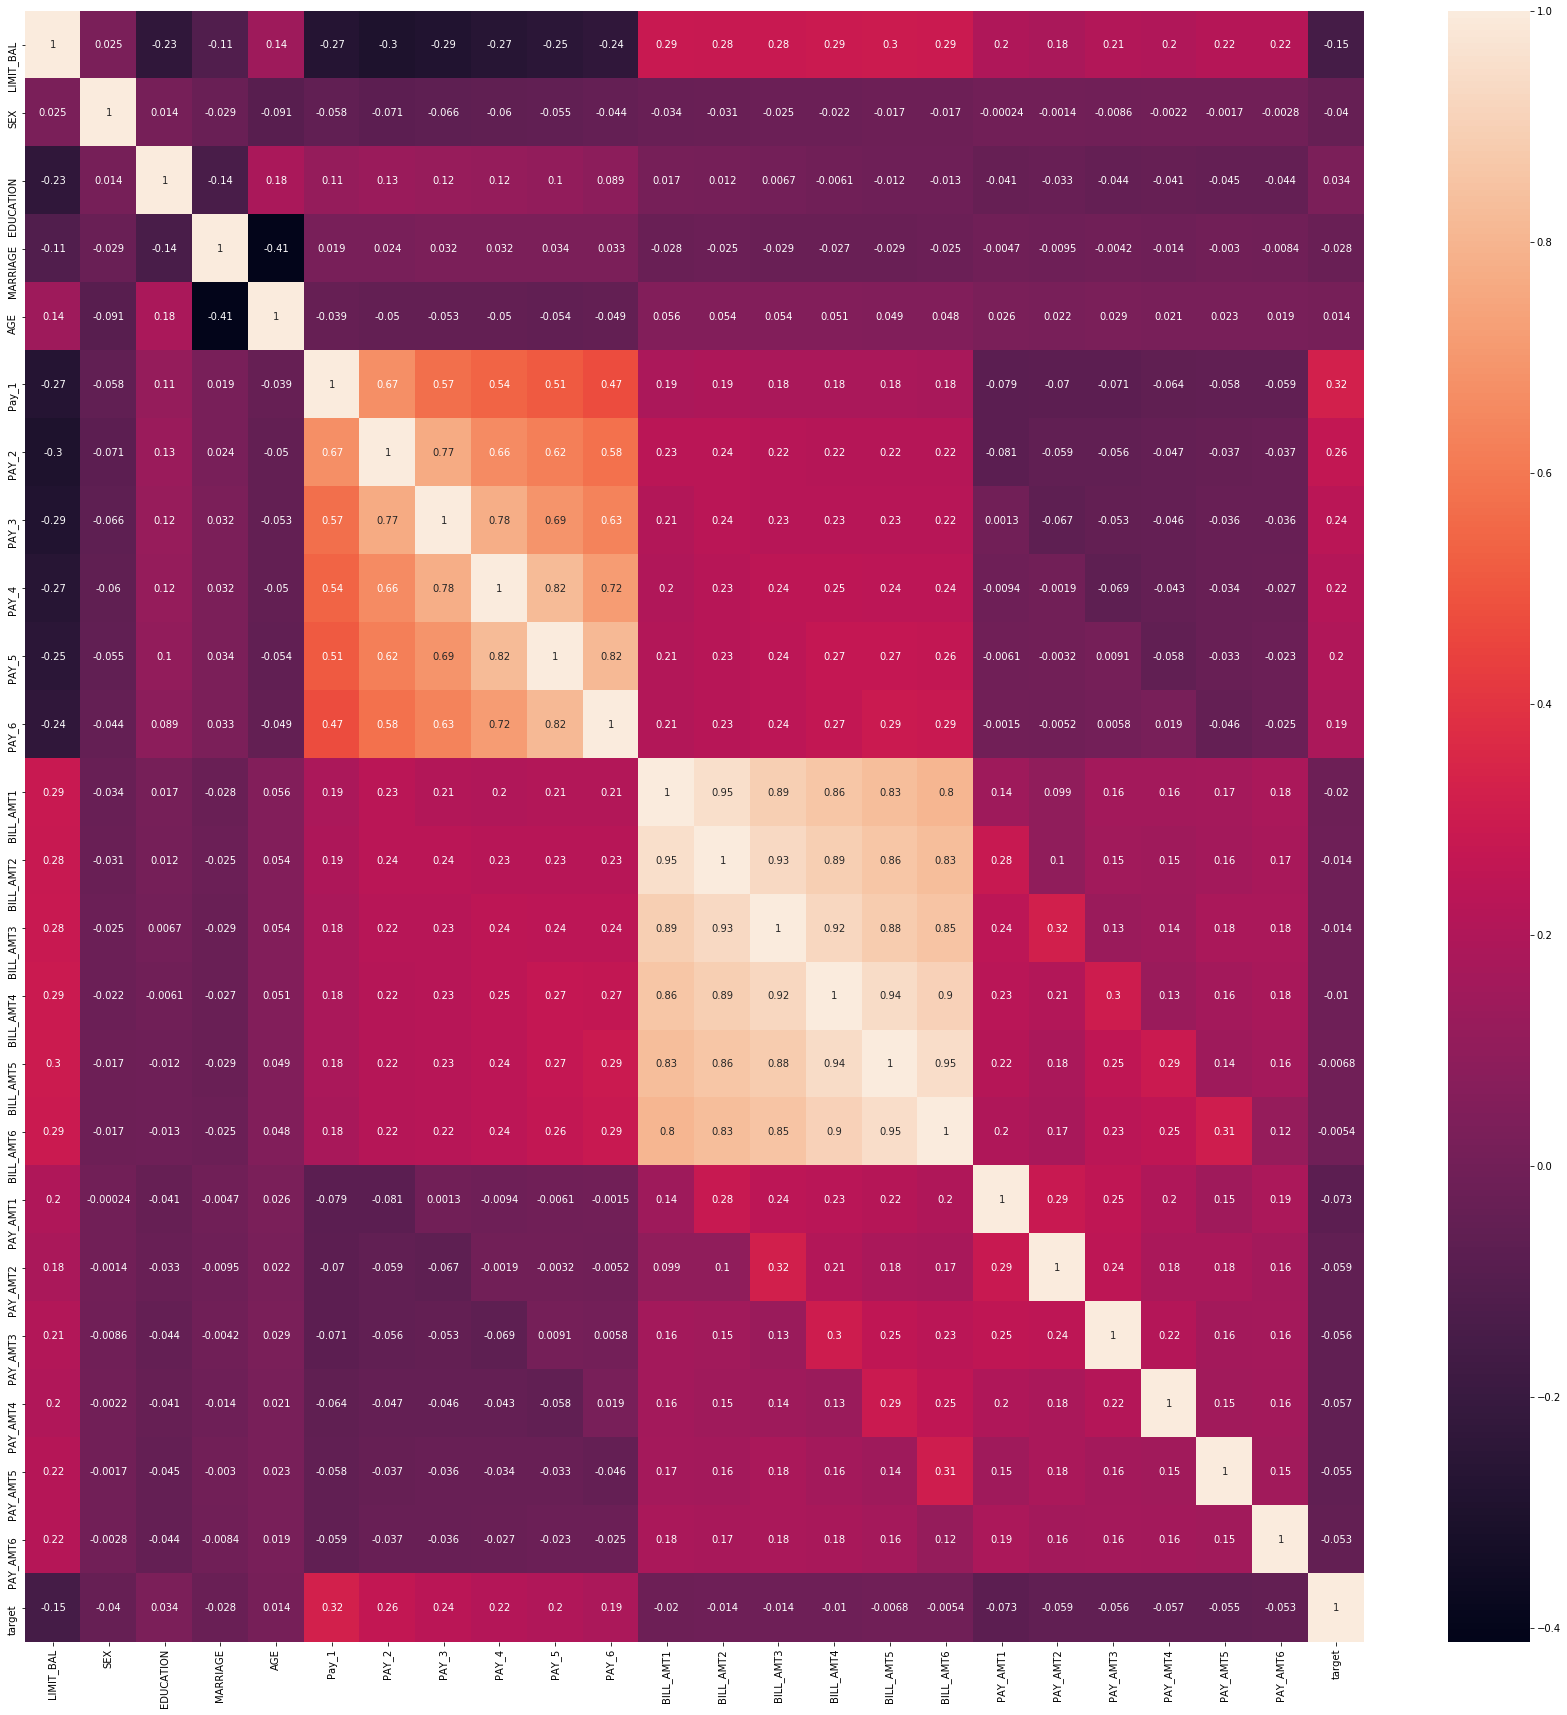

In [22]:
plt.subplots(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [23]:
X=df.drop('target',axis=1)
y=df['target']

In [24]:
smk=SMOTETomek(random_state=42)
X,y=smk.fit_resample(X,y)

In [25]:
y.value_counts()

1    22741
0    22741
Name: target, dtype: int64

In [26]:
print(X.shape)
print(y.shape)

(45482, 23)
(45482,)


In [27]:
LR= LogisticRegression()
score=cross_val_score(LR,X,y,cv=10)
score.mean()

0.595489155222339

In [28]:
RFC=RandomForestClassifier()
score=cross_val_score(RFC,X,y,cv=10)
score.mean()

0.8471530561483064

In [29]:
KNN=KNeighborsClassifier()
score=cross_val_score(KNN,X,y,cv=10)
score.mean()

0.7657768057889341

In [30]:
XG=xgboost.XGBClassifier()
score=cross_val_score(XG,X,y,cv=10)
score.mean()

0.8180003607740052

In [31]:
#from sklearn.preprocessing import StandardScaler
#scaling=StandardScaler()
#X=scaling.fit_transform(X)

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [33]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4,6,8]
min_samples_split = [2,5,10]
min_samples_leaf = [1, 2,4]
bootstrap=[True,False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'bootstrap':bootstrap
             }

In [34]:
random_search=RandomizedSearchCV(RFC,param_distributions=param_grid,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [35]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   scoring='roc_auc', verbose=3)

In [36]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=8, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=80)

In [37]:
classifier=RandomForestClassifier(bootstrap=False, max_depth=8, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=80)
score=cross_val_score(classifier,X_train,y_train,cv=10)
score.mean()

0.771276141632667

In [38]:
score

array([0.77080891, 0.78510701, 0.77807095, 0.77543242, 0.76282615,
       0.76487833, 0.77074172, 0.76839636, 0.76751686, 0.7689827 ])

In [39]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=8, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=80)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
classifier.score(X_test,y_test)

0.7754814879957788

In [42]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [43]:
random_search2=RandomizedSearchCV(XG,param_distributions=param_grid,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search2.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [44]:
random_search2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, max_features='sqrt',
              min_child_weight=1, min_samples_leaf=4, min_samples_split=5,
              missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [46]:
classifier2=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=8, max_features='auto',
              min_child_weight=1, min_samples_leaf=1, min_samples_split=5,
             monotone_constraints='()', n_estimators=60, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [47]:
classifier2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=8, max_features='auto',
              min_child_weight=1, min_samples_leaf=1, min_samples_split=5,
              missing=nan, monotone_constraints='()', n_estimators=60, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [48]:
y_pred2 = classifier2.predict(X_test)

In [49]:
classifier2.score(X_test,y_test)

0.8271040365842933

In [50]:
roc_auc_score(y_test,y_pred2)

0.8271205492487521

In [51]:
print(metrics.classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      5680
           1       0.84      0.81      0.82      5691

    accuracy                           0.83     11371
   macro avg       0.83      0.83      0.83     11371
weighted avg       0.83      0.83      0.83     11371



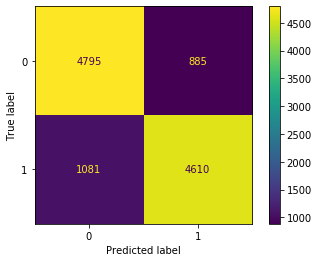

In [52]:
plot_confusion_matrix(classifier2, X_test, y_test,labels=[0,1],ax=None)